## **Code for Credit Card Fraud Detection**    


---

 



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import gridspec 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
df = pd.read_csv("./drive/My Drive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Unique values in the dataset


In [ ]:
df['Class'].unique()

array([0, 1])

0 for non-fraudulent transactions,
1 for fraudulent transactions

check how many samples each target class is having


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# Determine number of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
outlier_percent = len(Fraud)/float(len(Valid))
print(outlier_percent *100)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))

print('Valid Transactions:: {}'.format(len(df[df['Class'] == 0])))



0.17304750013189596
Fraud Cases: 492
Valid Transactions:: 284315


Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

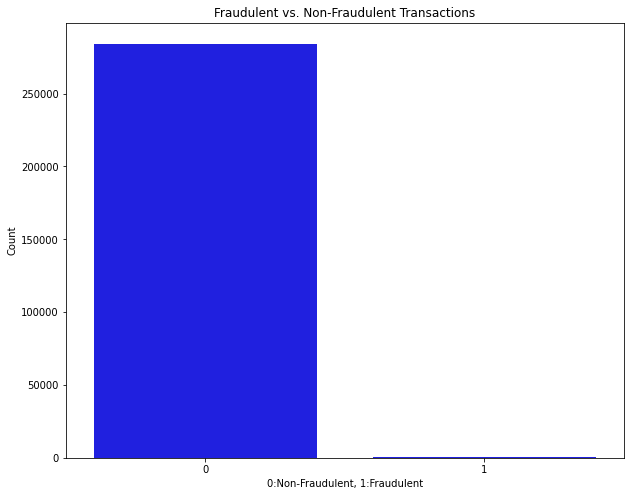

In [ ]:

#fraud vs. non-fraud transactions
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

There is only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


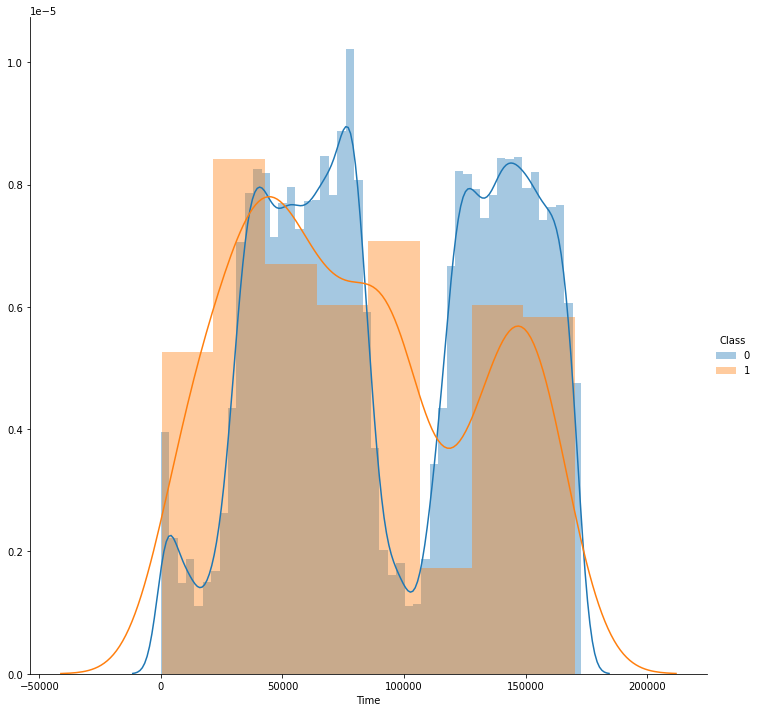

In [ ]:
sns.FacetGrid(df, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

So from this graph we can observe that there is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


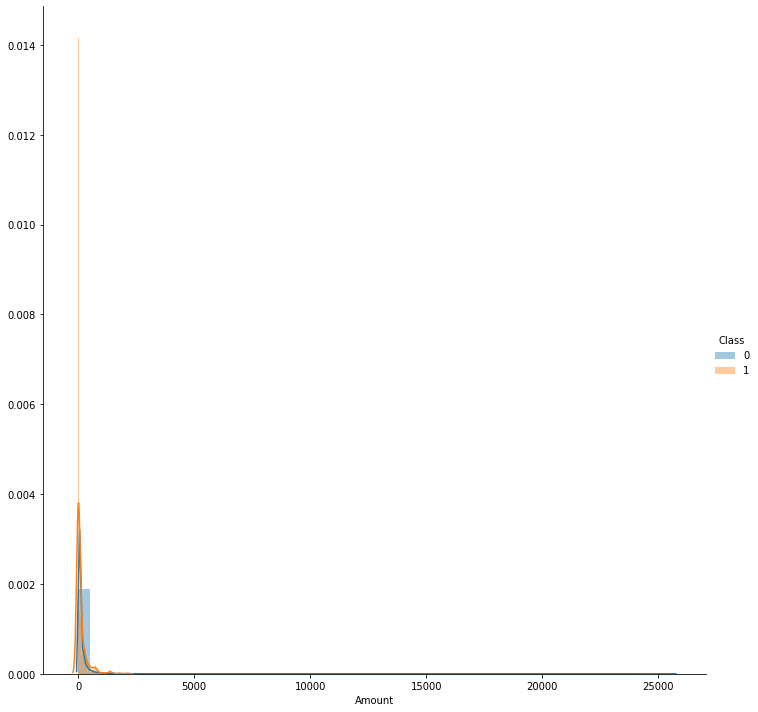

In [ ]:
sns.FacetGrid(df, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()


Hence from this graph we can  observe that most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

Removal of irrelevant features


In [ ]:
df.drop(['Time'],axis=1,inplace=True)

In [ ]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Checking null & missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print("Amount details of fraudulent transaction")
df.Amount.describe()

Amount details of fraudulent transaction


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
Valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones are more. This makes this problem crucial to deal with.

Now, we will be visualizing all the features from the dataset on graphs.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

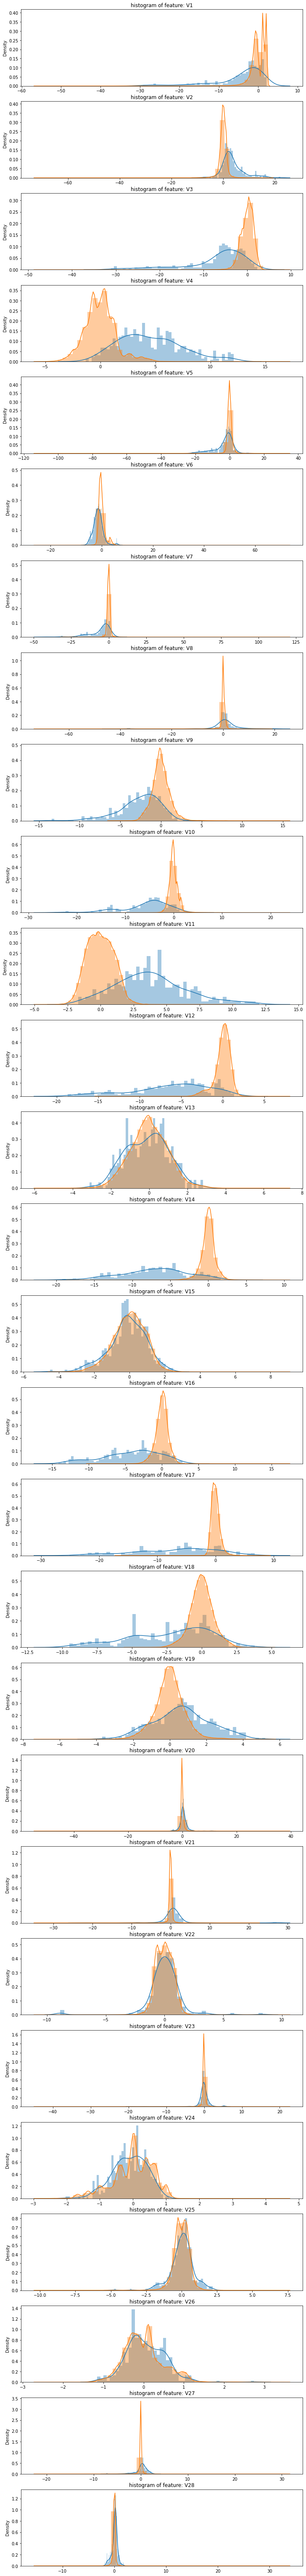

In [ ]:
# distribution of anomalous features
features = df.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(df[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(df[c][df.Class == 1], bins=50)
 sns.distplot(df[c][df.Class == 0], bins=50)
 ax.set_xlabel("")
 ax.set_title('histogram of feature: '+ str(c))
plt.show()

Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

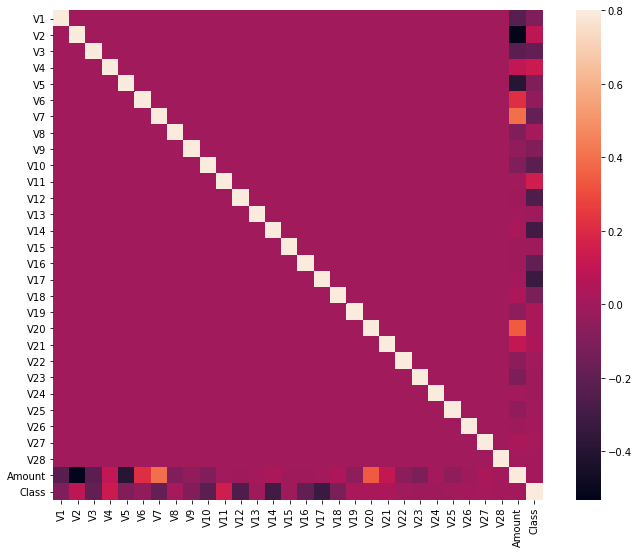

In [ ]:
# Correlation matrix 
corr_map = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corr_map, vmax = .8, square = True) 
plt.show() 

Our dataset doesn’t have any null values because the total number features are 284807 that ranges from 0-284806; all features have the same number of samples/rows.


Transforming the Amount column so that Amount values to a smaller range of numbers. 

In [ ]:
df['Amount'][0:4]

0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
df['norm_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis=1)
df['norm_amount'][0:4]

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Setting of features and label


In [ ]:
X = df.iloc[:,:-1]    #all columns excepy class
y = df.iloc[:,-1]     #class column

print("Features",X)


Features                V1         V2        V3  ...       V27       V28  Class
0       -1.359807  -0.072781  2.536347  ...  0.133558 -0.021053      0
1        1.191857   0.266151  0.166480  ... -0.008983  0.014724      0
2       -1.358354  -1.340163  1.773209  ... -0.055353 -0.059752      0
3       -0.966272  -0.185226  1.792993  ...  0.062723  0.061458      0
4       -1.158233   0.877737  1.548718  ...  0.219422  0.215153      0
...           ...        ...       ...  ...       ...       ...    ...
284802 -11.881118  10.071785 -9.834783  ...  0.943651  0.823731      0
284803  -0.732789  -0.055080  2.035030  ...  0.068472 -0.053527      0
284804   1.919565  -0.301254 -3.249640  ...  0.004455 -0.026561      0
284805  -0.240440   0.530483  0.702510  ...  0.108821  0.104533      0
284806  -0.533413  -0.189733  0.703337  ... -0.002415  0.013649      0

[284807 rows x 29 columns]


In [ ]:
print("Label",y)

Label 0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: norm_amount, Length: 284807, dtype: float64


Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(X ,y ,test_size=0.20 ,random_state=42)
print("X_train",X_train)
print(X_train.shape)
print("X_test",X_test)
print(X_test.shape)
print("y_train",y_train)
print(y_train.shape)
print("y_test",y_test)
print(y_test.shape)

X_train               V1        V2        V3  ...       V27       V28  Class
223361  1.955041 -0.380783 -0.315013  ...  0.045168 -0.047145      0
165061 -0.400975 -0.626943  1.555339  ... -0.370469 -0.144792      0
238186  0.072509  0.820566 -0.561351  ...  0.206395  0.070288      0
150562 -0.535045  1.014587  1.750679  ... -0.093013 -0.064931      0
138452 -4.026938  1.897371 -0.429786  ...  0.286904 -0.322672      0
...          ...       ...       ...  ...       ...       ...    ...
119879  1.173488  0.100792  0.490512  ... -0.020922  0.003967      0
259178 -0.775981  0.144023 -1.142399  ...  0.066006  0.137056      0
131932 -0.146609  0.992946  1.524591  ... -0.121139 -0.196195      0
146867 -2.948638  2.354849 -2.521201  ...  0.496912  0.335822      0
121958  1.233174 -0.784851  0.386784  ...  0.001217  0.038588      0

[227845 rows x 29 columns]
(227845, 29)
X_test                V1        V2         V3  ...       V27       V28  Class
43428  -16.526507  8.584972 -18.649853  ... -

As we know our data is quite imbalanced which will obviously directly affect our accuracy of the model.So,for that we will undersample our data,where our data records won't be repeated so it reduces the scope of outliers,however our dataset will be less than the original dataset

In [ ]:
## Target class distribution
class_val = df['Class'].value_counts()
print(f"Number of samples for each class :- \n {class_val}")
non_fraud = class_val[0]
fraud = class_val[1]
print(f"Non Fraudulent Numbers :- {non_fraud}")
print(f"Fraudulent Numbers :- {fraud}")




Number of samples for each class :- 
 0    284315
1       492
Name: Class, dtype: int64
Non Fraudulent Numbers :- 284315
Fraudulent Numbers :- 492


In [ ]:
## Equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = df[df.Class == 0].index
fraud_indices = np.array(df[df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

In [ ]:
## Equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = df[df.Class == 0].index
fraud_indices = np.array(df[df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)


## Undersampling techniques

# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = df.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

## Performing Decision Tree





Accuracy of model :- 0.8984771573604061
Confusion Matrix :- 
 [[91 15]
 [ 5 86]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       106
           1       0.85      0.95      0.90        91

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

AROC score :- 
 0.9017727555463404


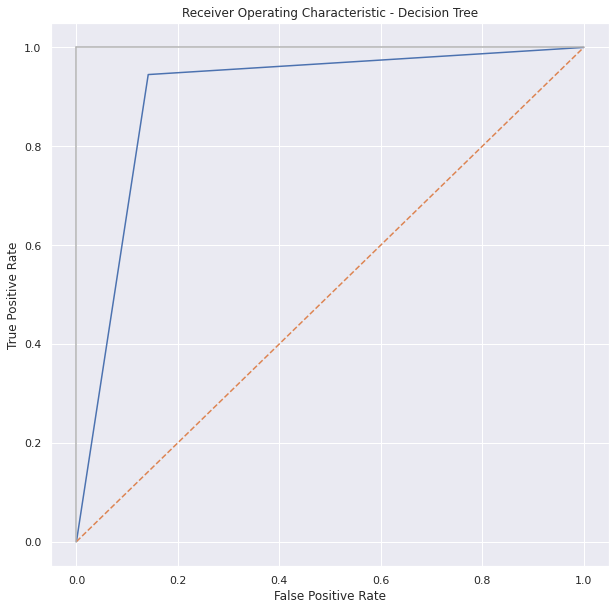

In [ ]:


from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier()
# train model by using fit method
dt_model.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = dt_model.predict(X_test_sample)


acc_score = dt_model.score(X_test_sample, y_test_sample)
print(f'Accuracy of model :- {acc_score}')

 
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, y_pred)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, y_pred)}")
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_sample, y_pred)
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
def make_confusion_matrix(dt_model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_pred = (dt_model.predict_proba(X_test_sample)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_sample, y_pred)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family ['.SF Compact Display'] not found. Falling back to DejaVu Sans.


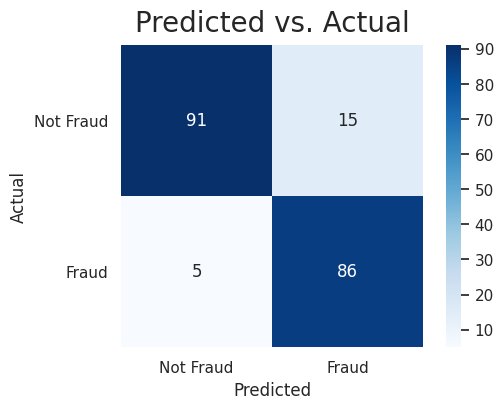

In [ ]:
make_confusion_matrix(dt_model, threshold=0.5)

### Performing Random Forest

Accuracy of model :- 0.9289340101522843
Confusion Matrix :- 
 [[98  8]
 [ 6 85]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.91      0.93      0.92        91

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

AROC score :- 
 0.9292971179763634


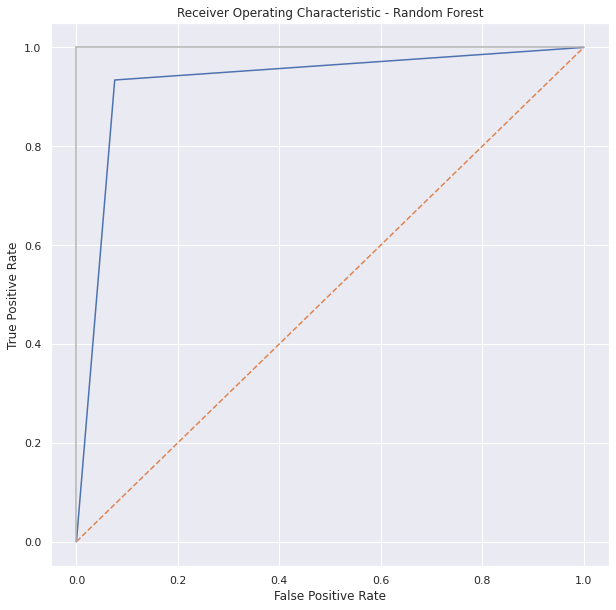

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)
# train model by using fit method
rf_model.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = rf_model.predict(X_test_sample)


acc_score = rf_model.score(X_test_sample, y_test_sample)
print(f'Accuracy of model :- {acc_score}')

 
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, y_pred)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, y_pred)}")
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_sample, y_pred)
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
def make_confusion_matrix(rf_model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_pred = (rf_model.predict_proba(X_test_sample)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_sample, y_pred)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

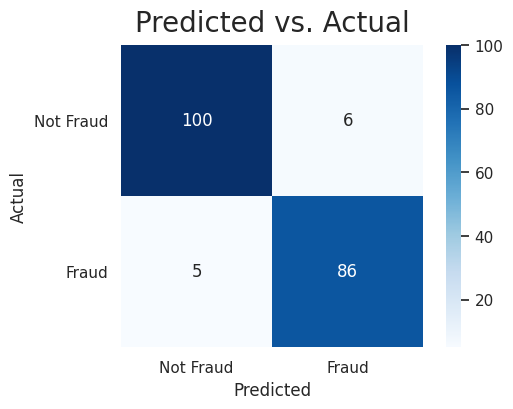

In [ ]:
make_confusion_matrix(rf_model, threshold=0.5)

### Performing Naive Bayes

Accuracy of model :- 0.8984771573604061
Confusion Matrix :- 
 [[99  7]
 [13 78]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       106
           1       0.92      0.86      0.89        91

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

AROC score :- 
 0.8955525606469003


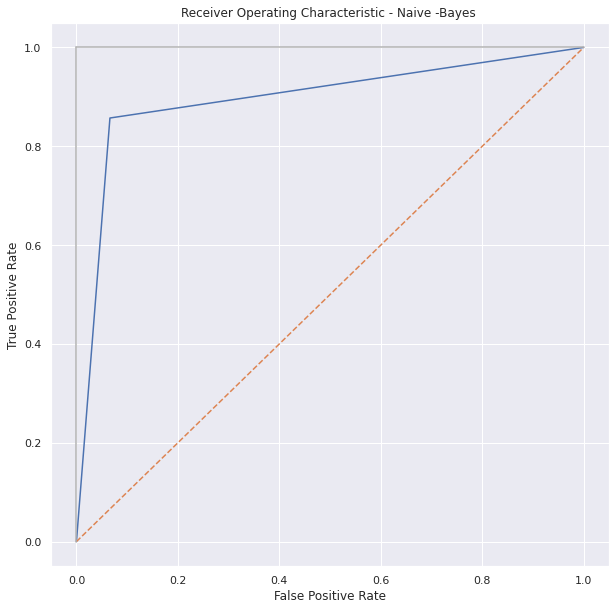

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
# train model by using fit method
nb_model.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = nb_model.predict(X_test_sample)


acc_score = nb_model.score(X_test_sample, y_test_sample)
print(f'Accuracy of model :- {acc_score}')

 
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, y_pred)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, y_pred)}")
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_sample, y_pred)
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive -Bayes ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def make_confusion_matrix(nb_model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_pred = (nb_model.predict_proba(X_test_sample)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_sample, y_pred)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

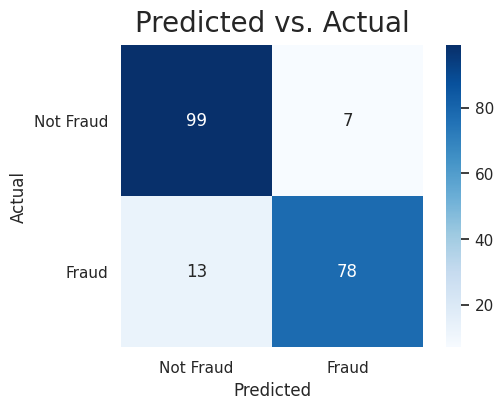

In [ ]:
make_confusion_matrix(nb_model, threshold=0.5)

### Performing Support Vector Machine

Accuracy of model :- 0.9289340101522843
Confusion Matrix :- 
 [[97  9]
 [ 5 86]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       106
           1       0.91      0.95      0.92        91

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

AROC score :- 
 0.9300746423387933


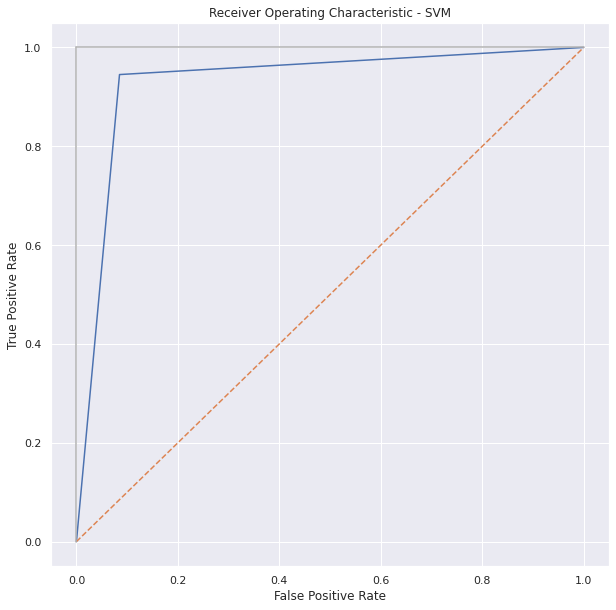

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
#from sklearn.svm import SVC, LinearSVC
#from sklearn.calibration import CalibratedClassifierCV

#model_svc = LinearSVC()
#svm_model = CalibratedClassifierCV(svm_model) 

svm_model= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
# train model by using fit method
svm_model.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = svm_model.predict(X_test_sample)


acc_score = svm_model.score(X_test_sample, y_test_sample)
print(f'Accuracy of model :- {acc_score}')

 
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, y_pred)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, y_pred)}")
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_sample, y_pred)
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Performing Logistic Regression

Accuracy of model on test dataset :- 0.9238578680203046
Confusion Matrix :- 
 [[96 10]
 [ 5 86]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       106
           1       0.90      0.95      0.92        91

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

AROC score :- 
 0.9253576612067179


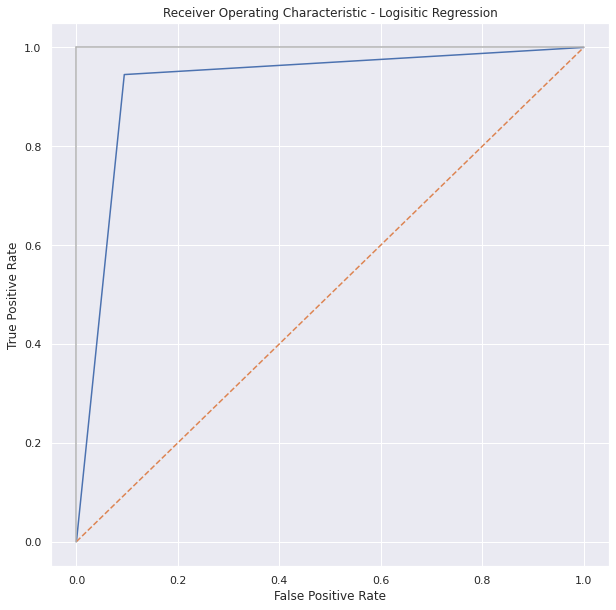

In [ ]:
from sklearn.linear_model import LogisticRegression
logr_model =LogisticRegression()
# train model by using fit method
logr_model.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = logr_model.predict(X_test_sample)


acc_score = logr_model.score(X_test_sample, y_test_sample)
print(f'Accuracy of model on test dataset :- {acc_score}')

 
# confusion matrix
print(f"Confusion Matrix :- \n {confusion_matrix(y_test_sample, y_pred)}")

# classification report for f1-score
print(f"Classification Report :- \n {classification_report(y_test_sample, y_pred)}")
print(f"AROC score :- \n {roc_auc_score(y_test_sample, y_pred)}")
# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test_sample, y_pred)
# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logisitic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
def make_confusion_matrix(logr_model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_pred = (logr_model.predict_proba(X_test_sample)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_sample, y_pred)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

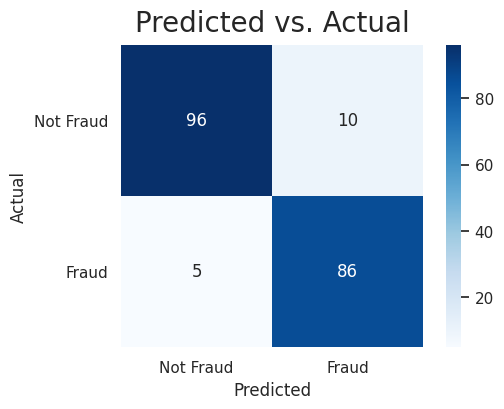

In [ ]:
make_confusion_matrix(logr_model, threshold=0.5)

### **Final Result table**

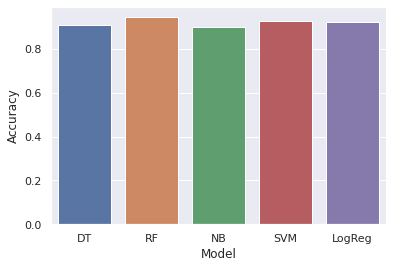

In [ ]:

ds = {'Model':["DT","RF", "NB","SVM","LogReg"], 'Accuracy':[0.908,0.944,0.898,0.928,0.923]}
dx = pd.DataFrame(ds)
sn.barplot(x='Model', y='Accuracy', data=dx)